# Análise de vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('data/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('data/alucar.csv')

In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
import seaborn as sns

In [10]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

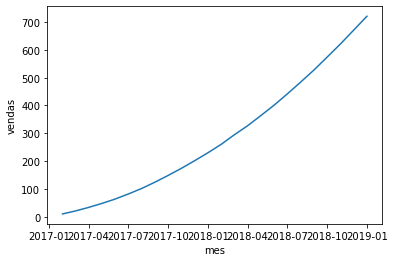

In [11]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

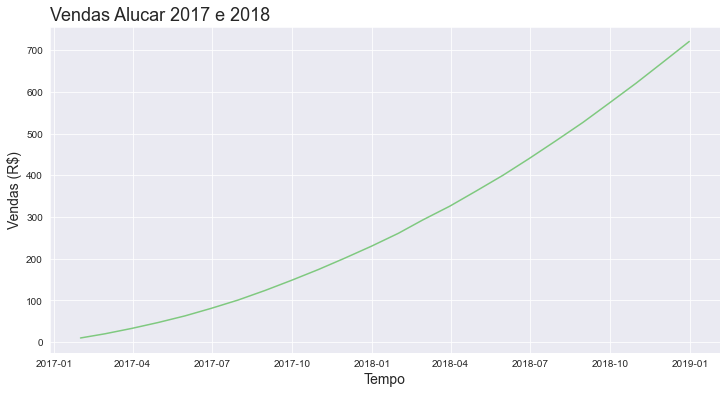

In [13]:
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [14]:
alucar['aumento'] = alucar['vendas'].diff()

In [15]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


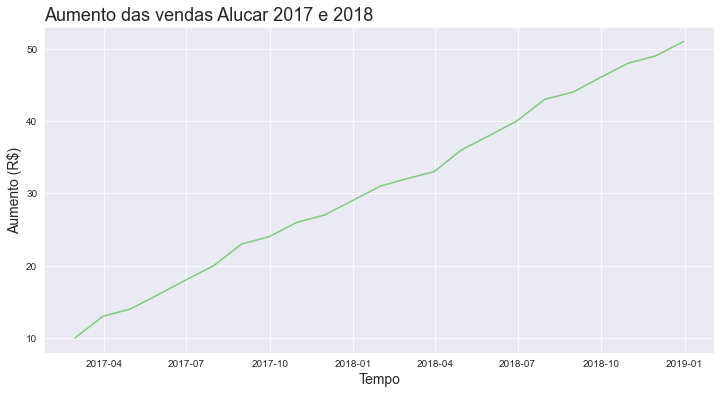

In [16]:
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento (R$)', fontsize = 14)
ax = ax

In [17]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

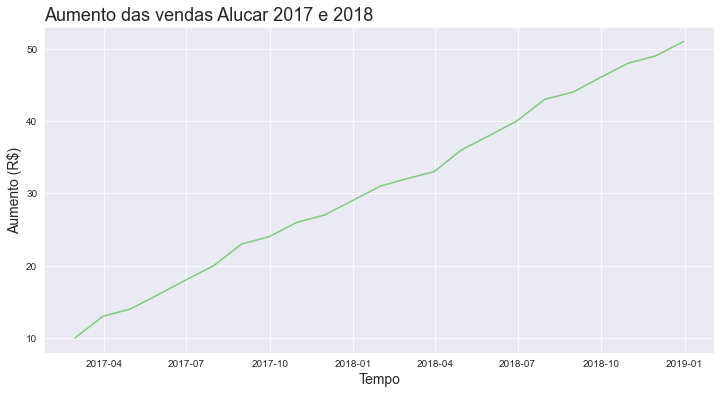

In [18]:
plotar('Aumento das vendas Alucar 2017 e 2018', 'Tempo', 'Aumento (R$)','mes','aumento', alucar)

In [19]:
alucar['aceleracao'] = alucar['aumento'].diff()

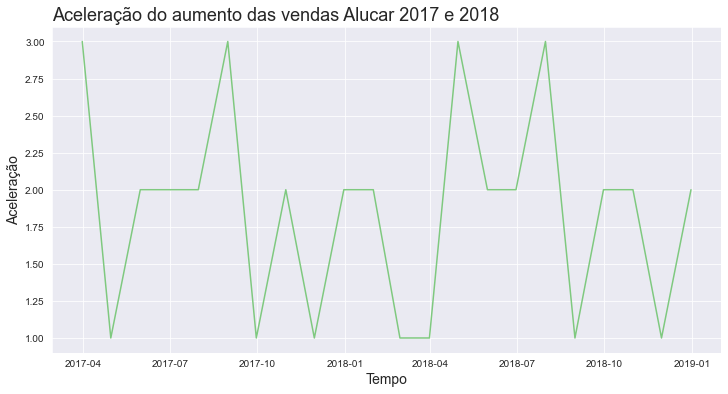

In [20]:
plotar('Aceleração do aumento das vendas Alucar 2017 e 2018', 'Tempo', 'Aceleração','mes','aceleracao', alucar)

In [21]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

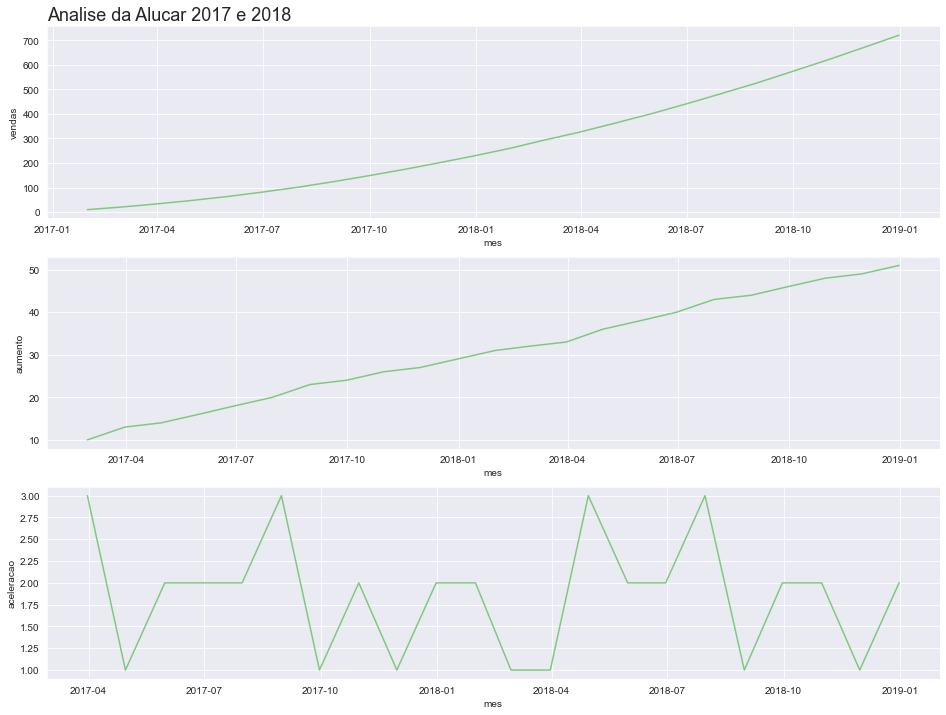

In [22]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise da Alucar 2017 e 2018', fontsize = 18, loc='left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)

In [23]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title('Analise da Alucar 2017 e 2018', fontsize = 18, loc='left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax=ax

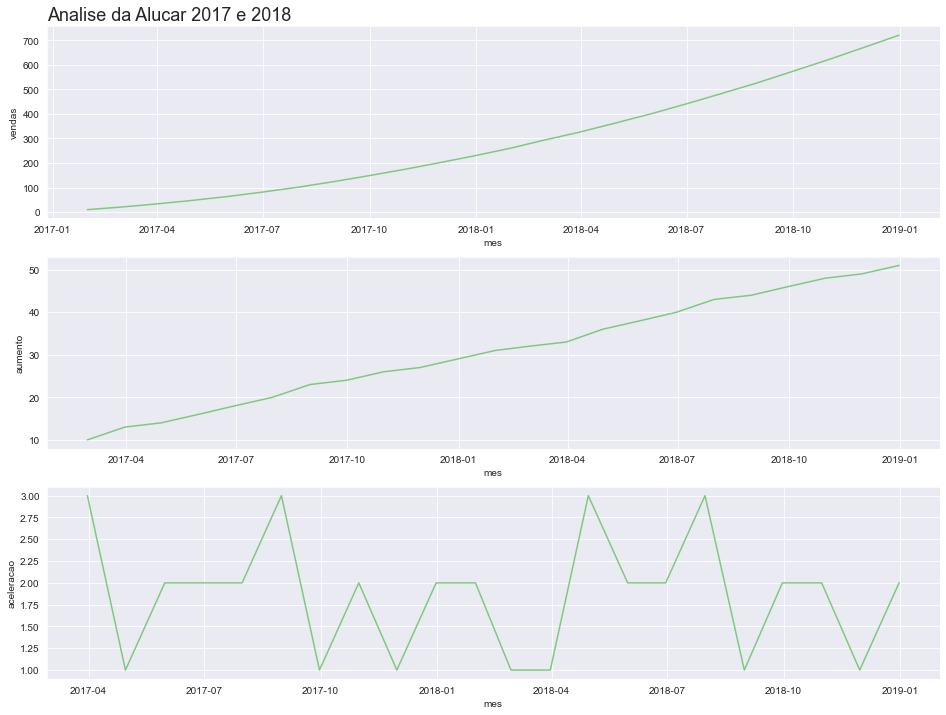

In [24]:
plot_comparacao('mes', 'vendas', 'aumento','aceleracao', alucar, 'Análise das vendas de Alucar 2017 e 2018')

In [25]:
from pandas.plotting import autocorrelation_plot

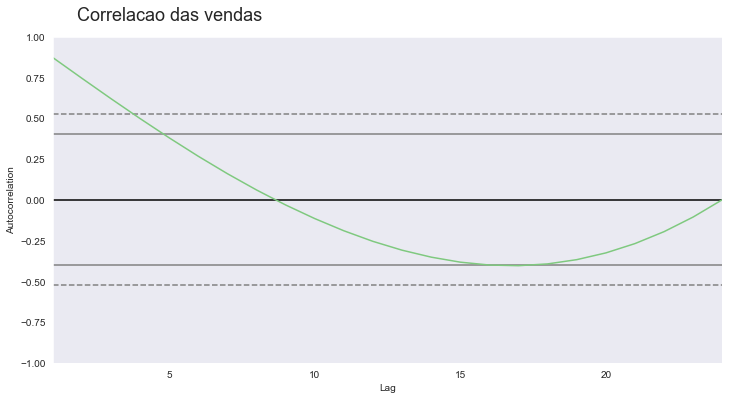

In [26]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize = 18, x=0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

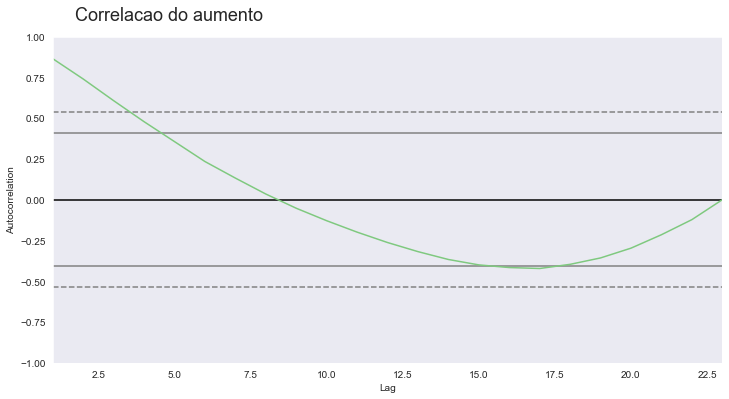

In [27]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao do aumento', fontsize = 18, x=0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

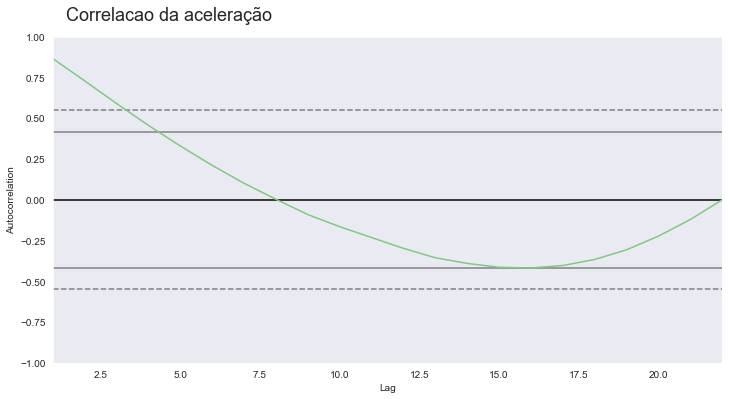

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao da aceleração', fontsize = 18, x=0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][2:])
ax=ax

# Análise assinantes newsletter

In [29]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [30]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [31]:
assinantes.isna().sum()

mes           0
assinantes    0
dtype: int64

In [32]:
assinantes.mes = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [33]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


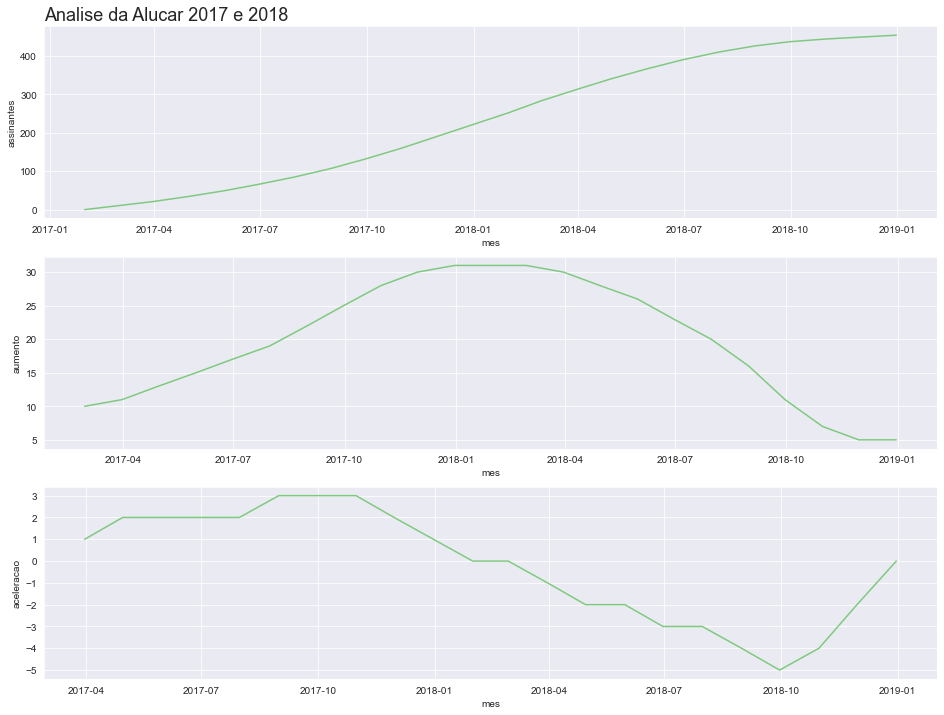

In [34]:
plot_comparacao('mes','assinantes','aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Análise Chocolura

In [35]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [36]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [37]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [38]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [39]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [40]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


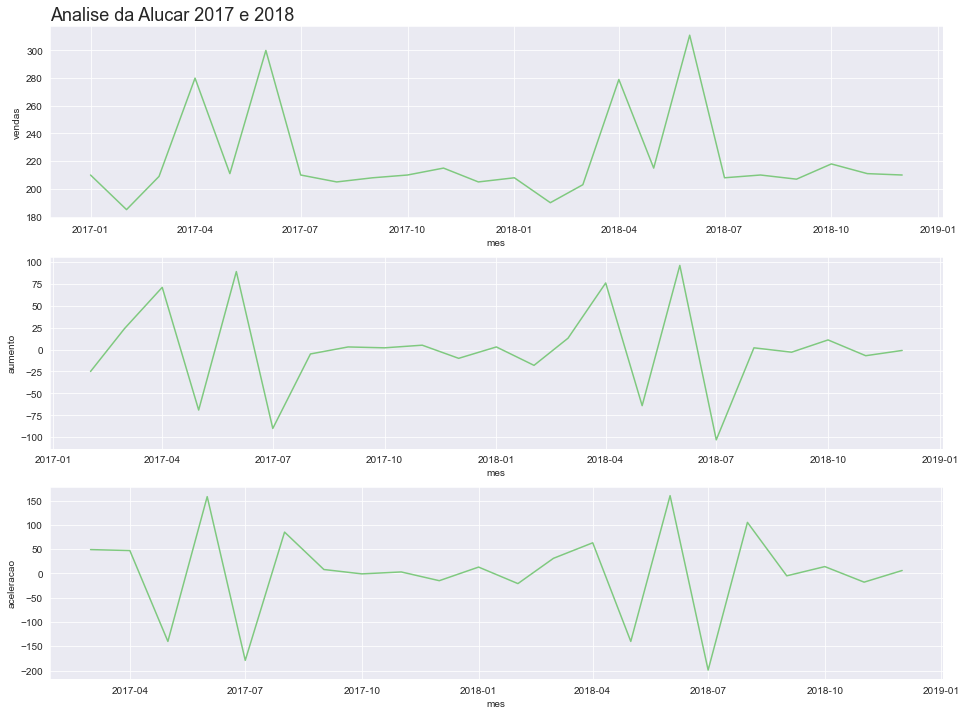

In [41]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise e vendas chocolura')

## Chocolura - Vendas diárias (Outubro - Novembro)

In [42]:
vendas_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [43]:
vendas_por_dia.shape

(61, 2)

In [44]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [45]:
vendas_por_dia.isna().sum()

dia       0
vendas    0
dtype: int64

In [46]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [47]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [48]:
vendas_por_dia['aumento']= vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


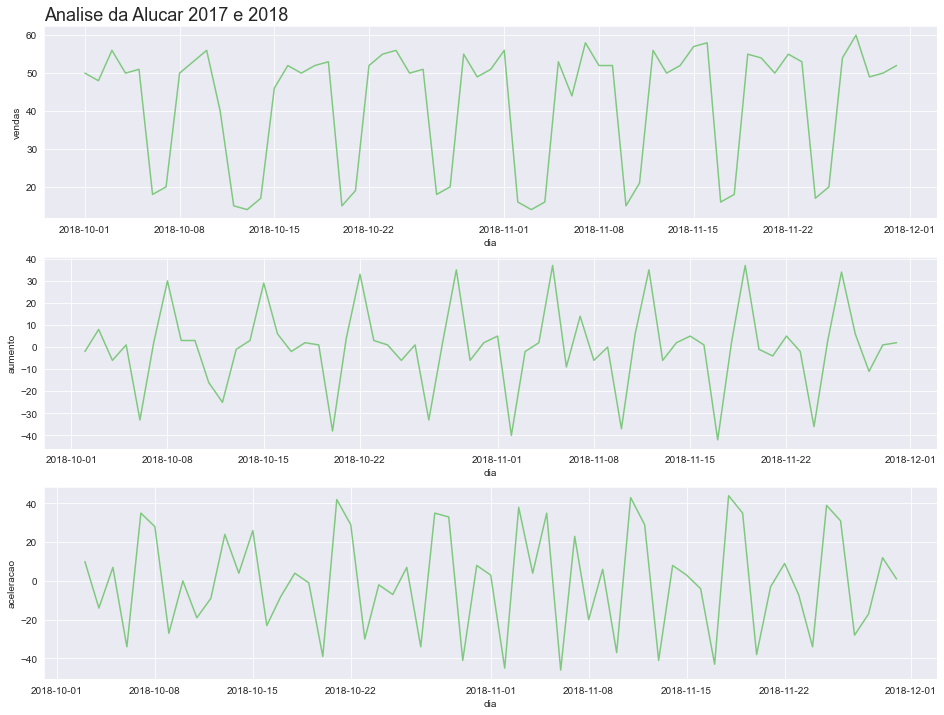

In [49]:
plot_comparacao('dia','vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas Outubro e Novembro')

In [50]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.weekday

In [51]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4


In [52]:
vendas_por_dia.dia_da_semana.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [53]:
dias_traduzidos = {
    6: 'Domingo', 0: 'Segunda', 1: 'Terca', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sabado'
}

In [54]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [55]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


### Agrupando por dias da semana

In [56]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-56-38016381f919>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [57]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


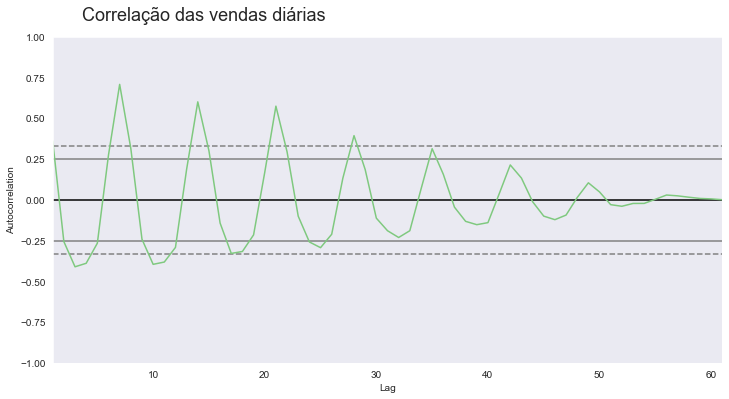

In [58]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax=ax

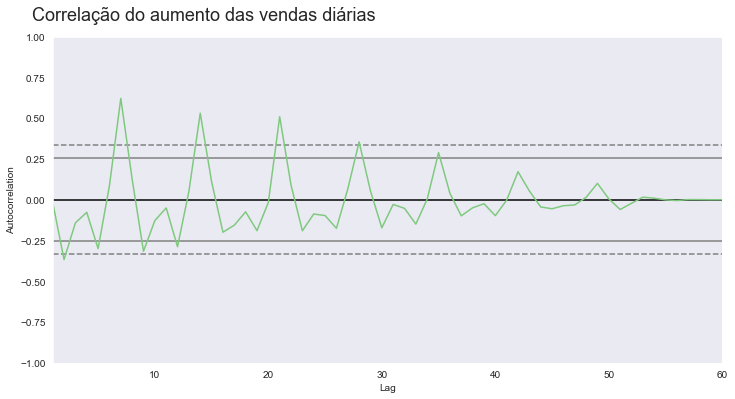

In [59]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.aumento[1:])
ax=ax

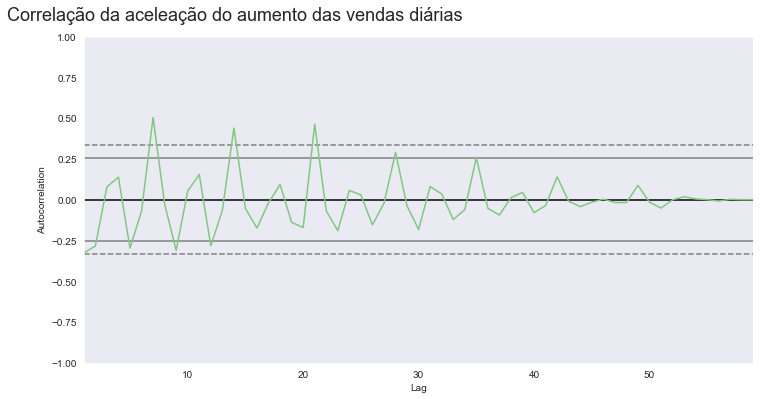

In [60]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleação do aumento das vendas diárias', fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:])
ax=ax

# Análise Cafelura

In [62]:
cafelura = pd.read_csv('data/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [63]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [64]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [65]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [66]:
cafelura.shape

(24, 2)

In [67]:
cafelura.isna().sum()

mes       0
vendas    0
dtype: int64

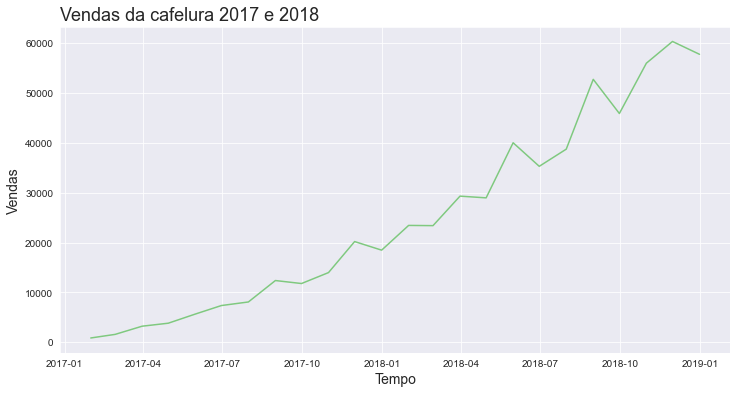

In [68]:
plotar('Vendas da cafelura 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [69]:
quantidade_de_dias_fim_semana = pd.read_csv('data/dias_final_de_semana.csv')
quantidade_de_dias_fim_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [70]:
cafelura['vendas_normalizadas'] = cafelura.vendas / quantidade_de_dias_fim_semana.quantidade_de_dias.values

In [71]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


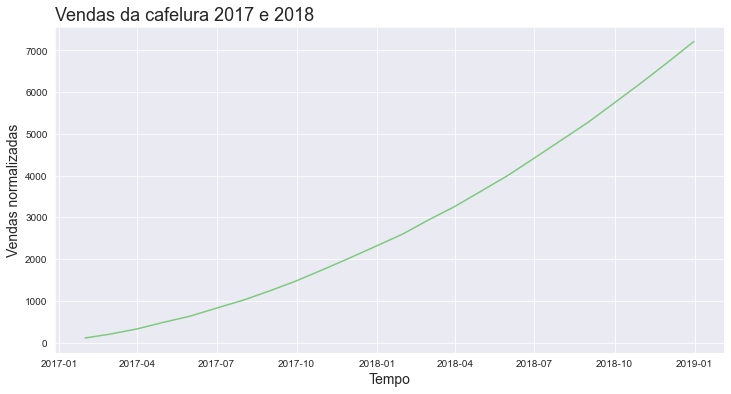

In [72]:
plotar('Vendas da cafelura 2017 e 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

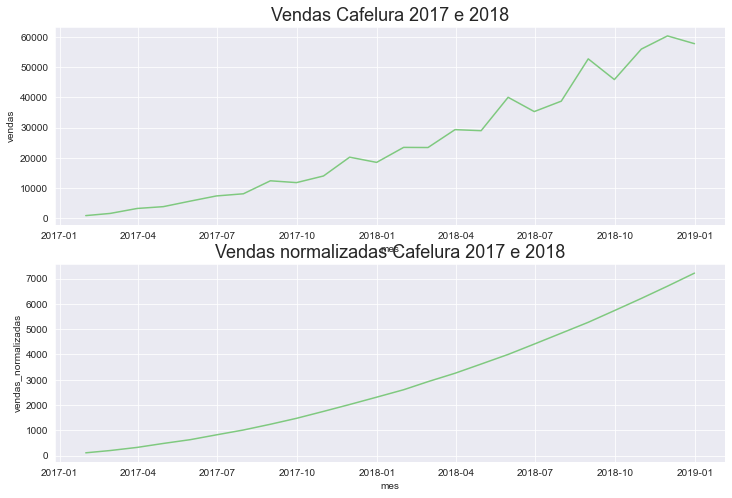

In [73]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

# StatsModels

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

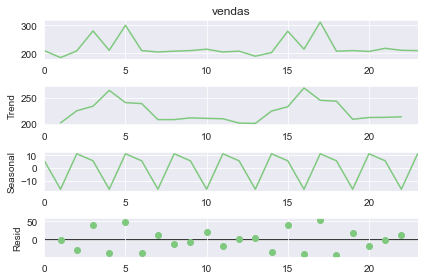

In [83]:
resultado = seasonal_decompose(chocolura.vendas, period=3)
ax = resultado.plot()

In [84]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [85]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


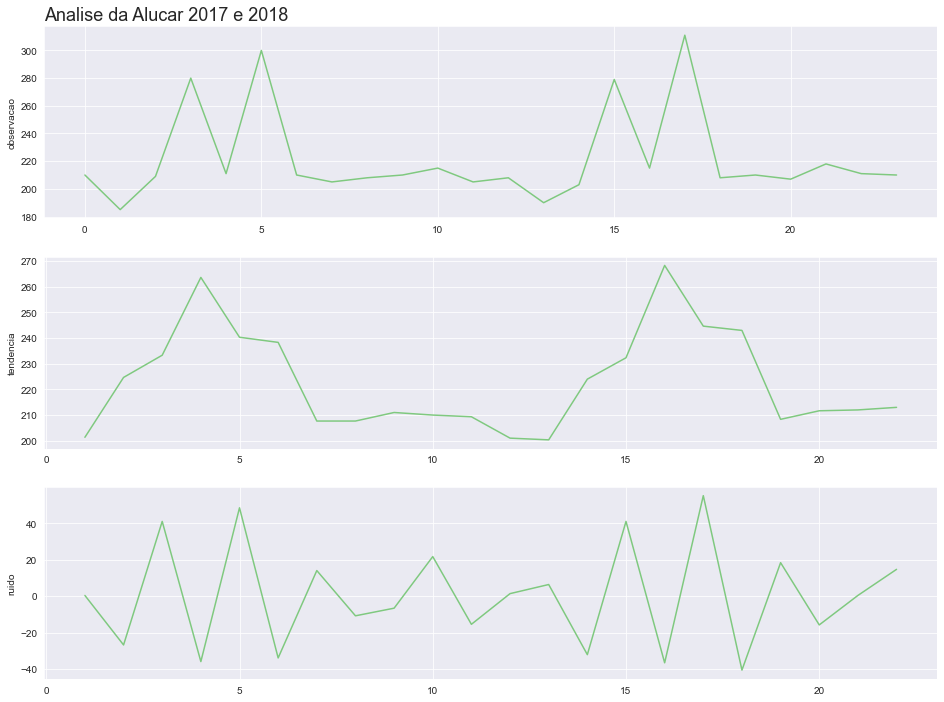

In [86]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# Análise Alucel

In [87]:
alucel = pd.read_csv('data/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [90]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [91]:
alucel.dia = pd.to_datetime(alucel.dia)

In [92]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [93]:
alucel.isna().sum()

dia       0
vendas    0
dtype: int64

In [94]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


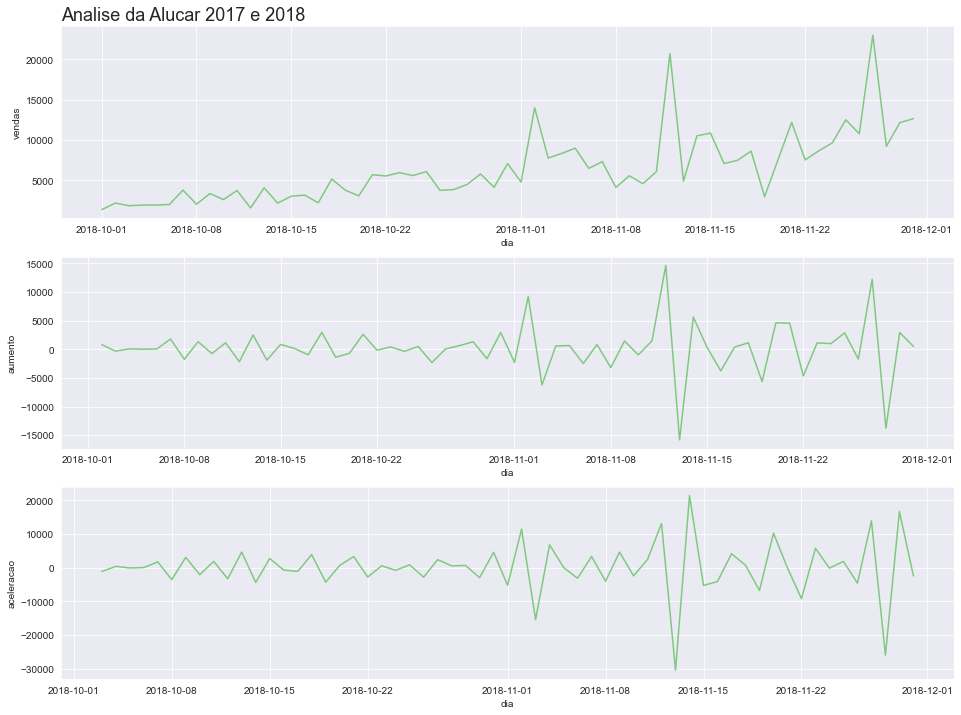

In [95]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de venas da Alucel Outubro e Novembro de 2018')

## Média móvel

In [96]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [98]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


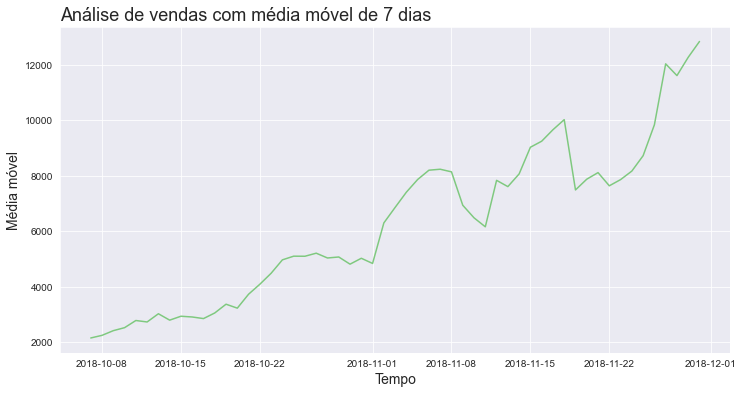

In [99]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

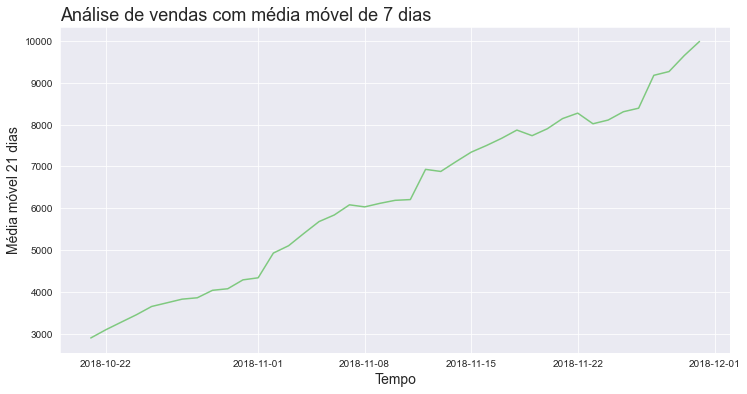

In [100]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel 21 dias', 'dia', 'media_movel_21', alucel)

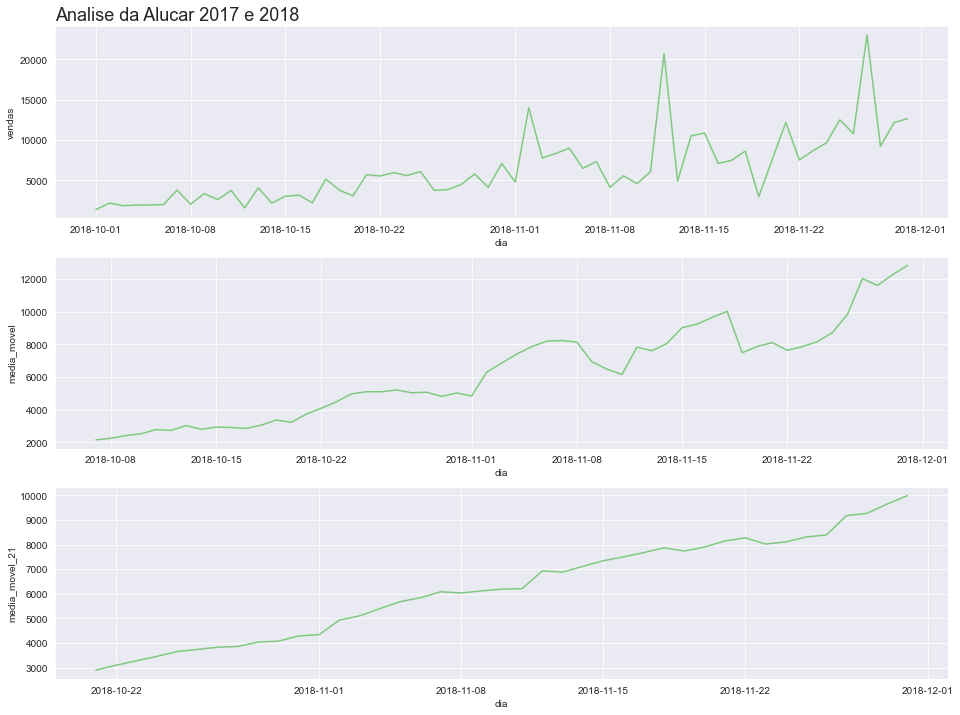

In [101]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')